Project 1- ChatBot

In [1]:
import pickle #module used to serialize and deserialize any Python object structure
import numpy as np #module used for numerical computations
import keras #module used for learning and training models

In [2]:
with open("train.txt", "rb") as fp: #opening required file
    train_data= pickle.load(fp) #deserializing object file
train_data #displays training data


[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [3]:
type(train_data) #shows the datatype of the training data

list

In [4]:
len(train_data) #shows the size or length of the training data

10000

In [5]:
with open("test.txt", "rb") as fp: #opening testing data file
    test_data= pickle.load(fp) #deserializing the object file
test_data #displays testing data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [6]:
type(test_data) #displays datatype

list

In [7]:
len(test_data) #displays length/size

1000

In [8]:
all_data= test_data + train_data #combines training and testing data in a single variable
all_data #displays the whole dataset

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [9]:
type(all_data) #displays datatype

list

In [10]:
len(all_data) #displays size/length

11000

In [11]:
vocab= set() #creates a set to store multiple items
for story, question, answer in all_data: #loop used to store all the words in story and question sets into the vocab set
    vocab= vocab.union(set(story))
    vocab= vocab.union(set(question))
vocab.add('yes') #adds the word 'yes' to the vocab set
vocab.add('no') #adds the word 'no' to the vocab set
vocab #displays the vocab set

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [12]:
len(vocab) #displays the size/length

37

In [13]:
vocab_len= len(vocab)+1 #updates vocab length value by 1
vocab_len

38

In [14]:
for data in all_data: #loop to print the size of story anod question for all data
    print(len(data[0]), " ", len(data[1]))
max_story_len= max([len(data[0]) for data in all_data]) #stores maximum story length
max_question_len= max([len(data[1]) for data in all_data]) #stores maximum question length
print(max_story_len, " ", max_question_len)


12   6
23   6
35   6
47   6
59   6
13   6
26   6
37   6
50   6
62   6
12   6
24   6
37   6
49   6
60   6
12   6
25   6
38   6
50   6
62   6
12   6
24   6
36   6
47   6
59   6
12   6
25   6
36   6
48   6
59   6
12   6
26   6
39   6
51   6
63   6
13   6
24   6
37   6
50   6
62   6
13   6
26   6
38   6
50   6
63   6
13   6
25   6
36   6
49   6
61   6
13   6
26   6
39   6
51   6
64   6
13   6
25   6
37   6
50   6
62   6
13   6
25   6
37   6
50   6
61   6
12   6
25   6
38   6
50   6
62   6
12   6
25   6
37   6
50   6
61   6
12   6
25   6
36   6
48   6
60   6
12   6
24   6
36   6
48   6
60   6
13   6
25   6
37   6
49   6
60   6
13   6
25   6
39   6
51   6
64   6
12   6
25   6
37   6
49   6
61   6
12   6
25   6
38   6
50   6
61   6
12   6
24   6
36   6
49   6
62   6
13   6
25   6
37   6
50   6
62   6
12   6
23   6
35   6
47   6
59   6
12   6
25   6
37   6
48   6
73   6
12   6
24   6
37   6
49   6
61   6
12   6
24   6
37   6
49   6
62   6
14   6
26   6
37   6
49   6
62   6
12   6
23   6
35   6

In [15]:
from keras.preprocessing.text import Tokenizer #tokenizer used to split larger bodies of texts
from keras.preprocessing.sequence import pad_sequences #ensures all sequences in a list have the same length

In [16]:
token= Tokenizer(filters=[]) #filters he default punctuations and stores the characters in token
token.fit_on_texts(vocab) #used to update the vocabulary
token.word_index #displays the number given to each word

{'mary': 1,
 'bedroom': 2,
 'went': 3,
 'grabbed': 4,
 'left': 5,
 'up': 6,
 'discarded': 7,
 'hallway': 8,
 '.': 9,
 'back': 10,
 'put': 11,
 'got': 12,
 'took': 13,
 'no': 14,
 'sandra': 15,
 'bathroom': 16,
 'travelled': 17,
 'picked': 18,
 'office': 19,
 'to': 20,
 'kitchen': 21,
 'garden': 22,
 'there': 23,
 'football': 24,
 'apple': 25,
 'john': 26,
 'the': 27,
 'in': 28,
 'journeyed': 29,
 'is': 30,
 'down': 31,
 'daniel': 32,
 'moved': 33,
 'milk': 34,
 '?': 35,
 'yes': 36,
 'dropped': 37}

In [17]:
train_story_text= [] #list for training data for story
train_question_text= [] #list for training data for question
train_answers= [] #list for training data for answer
for story, question, answer in train_data: #for loop to store story and question training data in created variables
    train_story_text.append(story)
    train_question_text.append(question)
train_story_seq= token.texts_to_sequences(train_story_text) #transforms the text to a sequence of integers
print(len(train_story_seq))
train_story_seq

10000


[[1, 33, 20, 27, 16, 9, 15, 29, 20, 27, 2, 9],
 [1,
  33,
  20,
  27,
  16,
  9,
  15,
  29,
  20,
  27,
  2,
  9,
  1,
  3,
  10,
  20,
  27,
  2,
  9,
  32,
  3,
  10,
  20,
  27,
  8,
  9],
 [1,
  33,
  20,
  27,
  16,
  9,
  15,
  29,
  20,
  27,
  2,
  9,
  1,
  3,
  10,
  20,
  27,
  2,
  9,
  32,
  3,
  10,
  20,
  27,
  8,
  9,
  15,
  3,
  20,
  27,
  21,
  9,
  32,
  3,
  10,
  20,
  27,
  16,
  9],
 [1,
  33,
  20,
  27,
  16,
  9,
  15,
  29,
  20,
  27,
  2,
  9,
  1,
  3,
  10,
  20,
  27,
  2,
  9,
  32,
  3,
  10,
  20,
  27,
  8,
  9,
  15,
  3,
  20,
  27,
  21,
  9,
  32,
  3,
  10,
  20,
  27,
  16,
  9,
  32,
  18,
  6,
  27,
  24,
  23,
  9,
  32,
  3,
  20,
  27,
  2,
  9],
 [1,
  33,
  20,
  27,
  16,
  9,
  15,
  29,
  20,
  27,
  2,
  9,
  1,
  3,
  10,
  20,
  27,
  2,
  9,
  32,
  3,
  10,
  20,
  27,
  8,
  9,
  15,
  3,
  20,
  27,
  21,
  9,
  32,
  3,
  10,
  20,
  27,
  16,
  9,
  32,
  18,
  6,
  27,
  24,
  23,
  9,
  32,
  3,
  20,
  27,
  2,
  9,
  

In [18]:
def vectorize_stories(data, word_index= token.word_index, max_story_len= max_story_len, max_question_len= max_question_len): #used to store the texts in the form of a vector (multi dimensional array of integers)
    X= []
    Xq= []
    Y= []

    for story, query, answer in data:
        x= [word_index[word.lower()] for word in story]
        xq= [word_index[word.lower()] for word in query]
        y= np.zeros(len(word_index)+1)
        y[word_index[answer]]= 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)

    return (pad_sequences(X, maxlen= max_story_len), pad_sequences(Xq, maxlen= max_question_len), np.array(Y))

In [19]:
input_train, query_train, answer_train= vectorize_stories(train_data) #stores the set of integers which refer to the training dataset
input_test, query_test, answer_test= vectorize_stories(test_data) #stores the set of integers which refer to the testing dataset

In [20]:
from tensorflow.python.keras.models import Sequential, Model #sequential groups a linear stack of objects into a Keras model, model groups layers into an object with training features
from keras.layers.embeddings import Embedding #embedding turns positive integers (indexes) into dense vectors of fixed size.
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM #functions used to work with the layers

In [21]:
input_seq= Input((max_story_len, )) #instantiates a Keras tensor
question= Input((max_question_len, ))

In [22]:
input_encoder_m= Sequential()
input_encoder_m.add(Embedding(input_dim= vocab_len, output_dim= 64))
input_encoder_m.add(Dropout(0.3)) 

In [23]:
input_encoder_c= Sequential()
input_encoder_c.add(Embedding(input_dim= vocab_len, output_dim= max_question_len))
input_encoder_c.add(Dropout(0.3)) 

In [24]:
question_encoder= Sequential()
question_encoder.add(Embedding(input_dim= vocab_len, output_dim= 64, input_length= max_question_len))
question_encoder.add(Dropout(0.3)) 

In [25]:
input_encoded_m= input_encoder_m(input_seq) #storing of encoded sequences in the different variables
input_encoded_c= input_encoder_c(input_seq)
question_encoded= question_encoder(question)

In [26]:
match= dot([input_encoded_m, question_encoded], axes= (2,2)) #performs dot product on tensors
match= Activation('softmax')(match) #softmax converts the vector of indexes into a vector of probabilities

In [27]:
response= add([match, input_encoded_c]) #performs addition operation
response= Permute((2, 1))(response) #permutes the dimensions of input according to a given pattern

In [28]:
answer= concatenate([response, question_encoded]) #performs concatenation of tensors
answer= LSTM(32)(answer) #Long Short-Term Memory Network (LSTM) is a variation of a recurrent neural network (RNN)
answer= Dropout(0.5)(answer)
answer= Dense(vocab_len)(answer) #dense layer performs a matrix-vector multiplication
answer= Activation('softmax')(answer)

In [29]:
model= Model([input_seq, question], answer)
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy']) #compiles the training model with the required optimizer, losses and the metrics that are to be evaluated
model.summary() #prints a string summary of the network

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 38,730
Trainable params: 38,730
Non-trainable params: 0
__________________________________________________________________________________________________


In [30]:
history= model.fit([input_train, query_train], answer_train, batch_size= 32, epochs= 20, validation_data= ([input_test, query_test], answer_test)) #training of the model


Epoch 1/20
313/313 [==============================] - 6s 10ms/step - loss: 0.7961 - accuracy: 0.4949 - val_loss: 0.6937 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 0.6953 - accuracy: 0.4931 - val_loss: 0.6970 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6947 - accuracy: 0.4991 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6948 - accuracy: 0.4991 - val_loss: 0.6947 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 3s 8ms/step - loss: 0.6943 - accuracy: 0.5102 - val_loss: 0.6957 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6943 - accuracy: 0.5047 - val_loss: 0.6984 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.6945 - accuracy: 0.5003 - val_loss: 0.6955 - val_accuracy: 0.5030
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


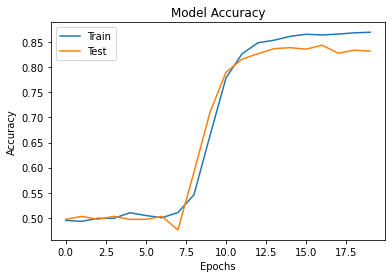

In [36]:
import matplotlib.pyplot as plt #to plot the required graphs
print(history.history.keys()) #lists all data in history variable
plt.plot(history.history['accuracy']) #plots training and testing accuracy
plt.plot(history.history['val_accuracy']) 
plt.title("Model Accuracy") #titles the plot
plt.ylabel("Accuracy") #labels y axis
plt.xlabel("Epochs") #labels x axis
plt.legend(['Train', 'Test'], loc= 'upper left') #displays the legend
plt.show() #displays the plot

In [38]:
model.load_weights("ChatBot_Model") #loads all layer weights

In [41]:
pred_results= model.predict(([input_test, query_test])) #generates output predictions for the input samples

In [44]:
story= ' '.join(word for word in test_data[75][0]) #sample training data
print(story)

Mary journeyed to the garden . Daniel travelled to the bathroom .


In [45]:
query= ' '.join(word for word in test_data[75][1])
print(query)

Is Daniel in the bathroom ?


In [46]:
print(test_data[75][2])

yes


In [47]:
val_max= np.argmax(pred_results[75])
for key, val in token.word_index.items():
    if val == val_max:
        k= key
print("Predicted Answer is ", k)
print("Probability of Certainty is ", pred_results[75][val_max])

Predicted Answer is  yes
Probability of Certainty is  0.866794


In [49]:
print(vocab)

{'Mary', 'bedroom', 'went', 'grabbed', 'left', 'up', 'discarded', 'hallway', '.', 'back', 'put', 'got', 'took', 'no', 'Sandra', 'bathroom', 'travelled', 'picked', 'office', 'to', 'kitchen', 'garden', 'there', 'football', 'apple', 'John', 'the', 'in', 'journeyed', 'Is', 'down', 'Daniel', 'moved', 'milk', '?', 'yes', 'dropped'}


In [55]:
story= "John discarded the apple . John grabbed the football . John went to the garden ."
story.split()

['John',
 'discarded',
 'the',
 'apple',
 '.',
 'John',
 'grabbed',
 'the',
 'football',
 '.',
 'John',
 'went',
 'to',
 'the',
 'garden',
 '.']

In [56]:
my_question= "Is John in the kitchen ?"
my_question.split()

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [62]:
mydata= [(story.split(), my_question.split(), 'no')]
my_story, my_ques, my_ans= vectorize_stories(mydata)
pred_results= model.predict(([my_story, my_ques]))

In [64]:
val_max= np.argmax(pred_results[0])
for key, val in token.word_index.items():
    if val == val_max:
        k= key
print("Predicted Answer is ", k)
print("Probability of Certainty is ", pred_results[0][val_max])

Predicted Answer is  no
Probability of Certainty is  0.96033525
